In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import load_img , ImageDataGenerator , img_to_array
from tensorflow.keras.models import Model , Sequential 
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Dropout , Flatten 
import random

In [3]:
all_batches = [] 
all_stickers = []
N=100
datagen= ImageDataGenerator(
    rescale=1./255 ,
    rotation_range=20,        # چرخش تصادفی بین ۰ تا ۴۰ درجه
    width_shift_range=0.2,    # جابه‌جایی عرضی
    height_shift_range=0.2,   # جابه‌جایی طولی
    shear_range=0.2,          # تغییر شکل برشی
    zoom_range=0.2,           # زوم تصادفی
    horizontal_flip=True,     # قرینه‌سازی افقی
    fill_mode="nearest"       # پر کردن پیکسل‌های خالی
)
for i in range(50) : 
    batch = []
    for j in range(20) : 
        path_cat = './CAT_AND_DOG/CAT\\' + 'cat.' +f'{20*i+j+1}'+'.jpg'
        path_dog = './CAT_AND_DOG/DOG\\' + 'dog.' +f'{20*i+j+1}'+'.jpg'
        catt = load_img(path_cat , target_size=(N , N))
        dogg = load_img(path_dog , target_size=(N , N))
        batch.append(catt)
        batch.append(dogg)
    y = [ 0 if k%2 ==0 else 1  for k in range(40)]
    batch= np.stack(batch)
    y = np.array(y).reshape(-1 , 1)
    idx= list(range(40))
    random.shuffle(idx)
    y = y[idx]
    batch = batch[idx , : , : ,:]
    im = datagen.flow(batch , batch_size=40)
    batch = next(im)
    all_batches.append(batch)
    all_stickers.append(y)

In [4]:
test_data = np.concatenate(all_batches[41:])
test_label = np.concatenate(all_stickers[41:])
train_data = np.concatenate(all_batches[:41])
train_label = np.concatenate(all_stickers[:41])
print(train_label.shape)


(1640, 1)


In [5]:
net = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(N, N, 3)),  # لایه کانولوشنی اول
    MaxPooling2D(pool_size=2 , strides=2),  # کاهش ابعاد
    
    Conv2D(32, (3,3), activation='relu'),  # لایه کانولوشنی دوم
    MaxPooling2D(pool_size=(2,2) , strides=2),  
    
    Conv2D(128, (3,3), activation='relu'),  # لایه کانولوشنی سوم
    MaxPooling2D(pool_size=(2,2)),  
    
    Flatten(),  # پهن کردن ویژگی‌ها برای لایه متراکم
    Dense(128, activation='relu'),  # لایه‌ی متراکم
    Dropout(0.1), 
    Dense(64, activation='relu'),  # لایه‌ی متراکم
    Dropout(0.1),  # برای جلوگیری از overfitting
    Dense(1, activation='sigmoid')  # خروجی (یک نود برای binary classification)
])
net.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

h = net.fit(train_data , train_label , epochs=30 , batch_size=100 , validation_data=(test_data , test_label))

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 503ms/step - accuracy: 0.5231 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.5096 - loss: 0.6952 - val_accuracy: 0.5139 - val_loss: 0.6932
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 442ms/step - accuracy: 0.4912 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 451ms/step - accuracy: 0.5007 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.5104 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.7031
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 460ms/step - accuracy: 0.5054 - loss: 0.6936 - val_accuracy: 0.4694 - val_loss: 0.6941
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.5774 - loss: 0.6862 - val_accuracy: 0.4944 - val_loss: 0.6944
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.5614 - loss: 0.6820 - val_accuracy: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


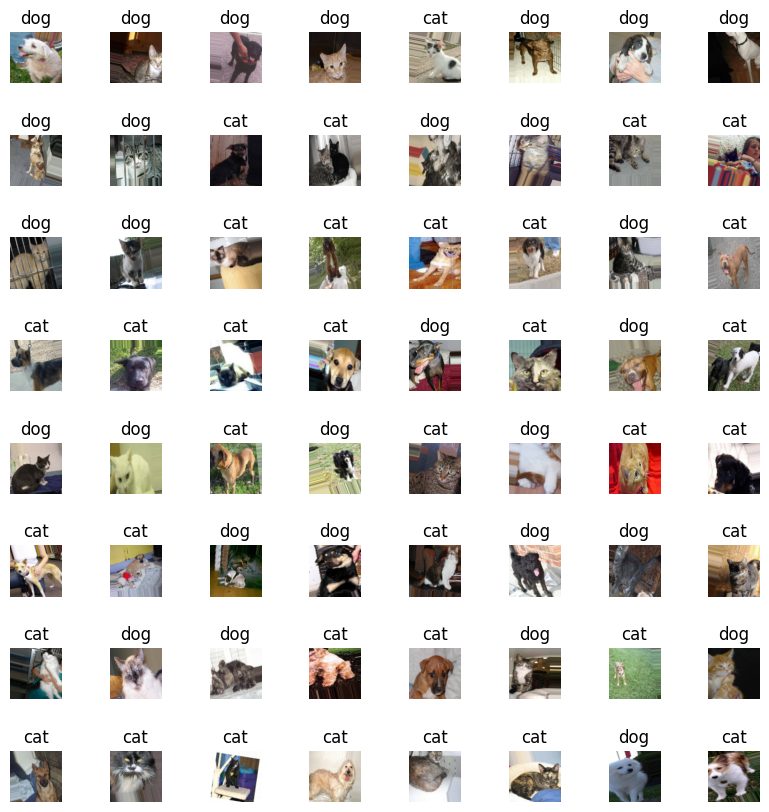

In [11]:
sample = train_data[:64, : ,: ,:]
result = net.predict(sample)
stickers = ['dog' if result[i]>0.5 else 'cat' for i in range(64)]
_ , ax = plt.subplots(8 ,8 ,figsize=(10 , 10))
for i in range (8) : 
    for j in range(8) : 
        pic = 255*sample[8*i+j , : , : ,:]
        ax[i , j].imshow(pic.astype(np.uint8))
        ax[i , j].set_title(stickers[8*i+j])
        ax[i , j].axis('off')
plt.subplots_adjust(wspace=0.3, hspace=1)
plt.show()